In [15]:
# importing libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df_india = df[df['job_country']== 'India'].copy()

df_india['job_posted_month'] = df_india['job_posted_date'].dt.strftime('%B')

df_india_pivot = df_india.pivot_table(index = 'job_posted_month', columns='job_title_short', aggfunc= 'size')

df_india_pivot.reset_index(inplace =True)



In [16]:
df_india_pivot['month_no'] = pd.to_datetime(
    df_india_pivot['job_posted_month'], format='%B').dt.month

df_india_pivot.sort_values('month_no', inplace = True)

df_india_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
4,January,175,31,628,2132,1444,70,127,448,269,192,1
3,February,143,35,433,1631,932,42,94,313,165,157,2
7,March,116,37,422,1591,1005,34,96,351,194,180,3
0,April,170,32,418,1566,946,54,86,375,194,169,4
8,May,103,14,278,1384,837,31,59,329,134,98,5
6,June,146,26,367,1632,1129,41,66,427,238,125,6
5,July,142,25,457,1528,1123,54,75,359,204,155,7
1,August,189,25,618,1407,1157,47,126,343,235,148,8
11,September,155,34,630,1508,984,67,85,324,195,132,9
10,October,170,36,500,1476,902,85,67,318,180,167,10


In [17]:
df_india_pivot.set_index('job_posted_month', inplace= True)

In [18]:
df_india_pivot.drop(columns='month_no', inplace= True)

df_india_pivot



job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,175,31,628,2132,1444,70,127,448,269,192
February,143,35,433,1631,932,42,94,313,165,157
March,116,37,422,1591,1005,34,96,351,194,180
April,170,32,418,1566,946,54,86,375,194,169
May,103,14,278,1384,837,31,59,329,134,98
June,146,26,367,1632,1129,41,66,427,238,125
July,142,25,457,1528,1123,54,75,359,204,155
August,189,25,618,1407,1157,47,126,343,235,148
September,155,34,630,1508,984,67,85,324,195,132


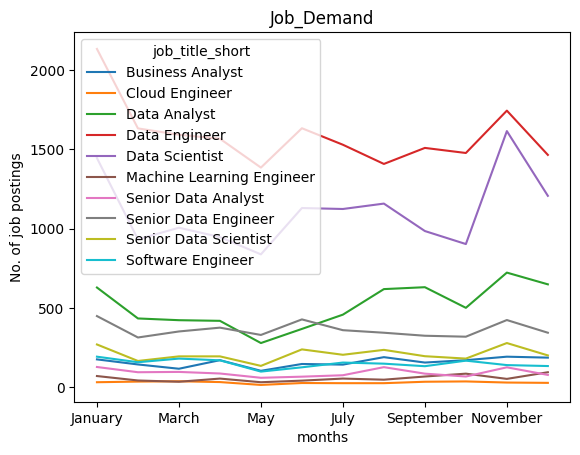

In [20]:
df_india_pivot.plot(kind= 'line')
plt.xlabel('months')
plt.ylabel('No. of job postings')
plt.title('Job_Demand')
plt.show()

In [21]:
top_3 = df_india['job_title_short'].value_counts().head(3)

top_3 

job_title_short
Data Engineer     19062
Data Scientist    13279
Data Analyst       6121
Name: count, dtype: int64

In [22]:
top_3.index

Index(['Data Engineer', 'Data Scientist', 'Data Analyst'], dtype='object', name='job_title_short')

In [26]:
top_3 = top_3.index.to_list()

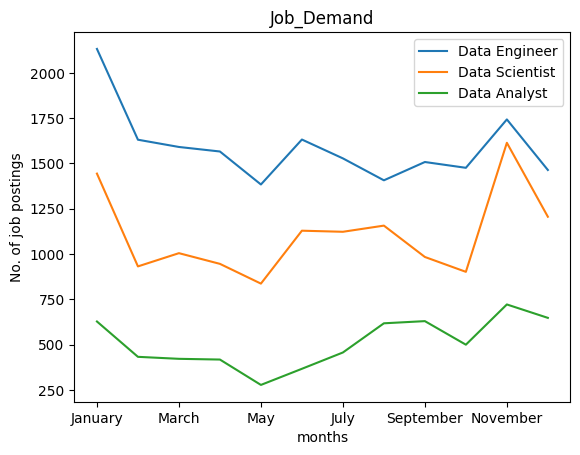

In [34]:
df_india_pivot[top_3].plot(kind='line')
plt.xlabel('months')
plt.ylabel('No. of job postings')
plt.legend()
plt.title('Job_Demand')
plt.show()